In [1]:
import tensorflow as tf
tf.__version__

'1.12.0'

In [2]:
import sys
sys.path.append('../alibi/explainers/counterfactual/')
import pandas as pd
import numpy as np
from scipy.spatial.distance import cityblock
from scipy.optimize import minimize
from sklearn import svm, datasets
from sklearn.model_selection import cross_val_score
import counterfactuals
from matplotlib.pyplot import imshow
import importlib
%matplotlib inline

In [3]:
from scipy.spatial.distance import cityblock

# Iris dataset

### Data prep/train

In [4]:
iris = datasets.load_iris()
X, y = iris.data, iris.target
clf = svm.SVC(gamma='scale',probability=True)
clf.fit(X,y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

### Explain

In [5]:
importlib.reload(counterfactuals)

<module 'counterfactuals' from '../alibi/explainers/counterfactual/counterfactuals.py'>

In [6]:
"""x=X[:1]
cf=counterfactuals.CounterFactualAdversarialSearch(clf,target_probability=0.1,tollerance=0.1,verbose=True)
cf.fit(X_train=X)
"""

'x=X[:1]\ncf=counterfactuals.CounterFactualAdversarialSearch(clf,target_probability=0.1,tollerance=0.1,verbose=True)\ncf.fit(X_train=X)\n'

In [7]:
x=X[:1]
cf=counterfactuals.CounterFactualRandomSearch(clf.predict_proba)
cf.fit(X_train=X)

In [8]:
expls=cf.explain(x)

Instance nb 0 of 10
0.8351879862119119 0.9351879862119119 0.1
0.5590710296863823 0.6590710296863823 0.1
0.10801032779086583 0.20801032779086584 0.1
0.00029292135786626594 0.10029292135786627 0.1
Search time:  0.006311893463134766
Instance nb 1 of 10
0.8433488605321677 0.9433488605321677 0.1
0.6190826909446384 0.7190826909446384 0.1
0.16343083084952822 0.26343083084952823 0.1
0.0015605413765091558 0.10156054137650916 0.1
Search time:  0.0034360885620117188
Instance nb 2 of 10
0.8415773194193277 0.9415773194193277 0.1
0.5790315353068858 0.6790315353068858 0.1
0.07951952551558242 0.17951952551558242 0.1
Search time:  0.0025730133056640625
Instance nb 3 of 10
0.8332000034517433 0.9332000034517433 0.1
0.5707411228862865 0.6707411228862865 0.1
0.10522836476985867 0.20522836476985867 0.1
0.0004852083308577032 0.10048520833085771 0.1
Search time:  0.0037698745727539062
Instance nb 4 of 10
0.8369871331615089 0.9369871331615088 0.1
0.5490582416191719 0.6490582416191719 0.1
0.11041182205768768 0.

In [9]:
expls['vector']

[array([[5.75039179, 3.37434697, 3.2177195 , 1.03764728]]),
 array([[6.37028338, 2.98010097, 3.29566327, 0.40196783]]),
 array([[5.6538676 , 3.09095885, 3.05598102, 0.59789325]]),
 array([[5.79395145, 2.87230384, 3.30696448, 0.31011314]]),
 array([[5.82821515, 2.82154461, 3.25774291, 0.38018994]]),
 array([[5.15411408, 2.96527767, 3.11053093, 0.71249872]]),
 array([[5.31350254, 2.87210589, 3.0276196 , 0.76398942]]),
 array([[5.74836381, 2.90469364, 3.17961726, 0.60416676]]),
 array([[5.23104139, 3.17607255, 3.38041667, 0.57778284]]),
 array([[5.17079817, 2.84940113, 3.34888489, 0.32848251]])]

In [10]:
for c in expls['vector']:
    print(cf._metric_distance(x,c))
    print(abs(x-c))

3.4314116021696504
[[0.65039179 0.12565303 1.8177195  0.83764728]]
3.8878135123283144
[[1.27028338 0.51989903 1.89566327 0.20196783]]
3.016783012312924
[[0.5538676  0.40904115 1.65598102 0.39789325]]
3.3387252261917286
[[0.69395145 0.62769616 1.90696448 0.11011314]]
3.444603393762172
[[0.72821515 0.67845539 1.85774291 0.18018994]]
2.8118660520633467
[[0.05411408 0.53472233 1.71053093 0.51249872]]
3.0330056678281645
[[0.21350254 0.62789411 1.6276196  0.56398942]]
3.4274541866210693
[[0.64836381 0.59530636 1.77961726 0.40416676]]
2.8131683590208207
[[0.13104139 0.32392745 1.98041667 0.37778284]]
2.7987644435552768
[[0.07079817 0.65059887 1.94888489 0.12848251]]


In [11]:
(0.14-0.1)**2<0.01

True

In [12]:
abs(x-cf.explaning_instance)

TypeError: unsupported operand type(s) for -: 'float' and 'NoneType'

# Mnist

### Data prep

In [13]:
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

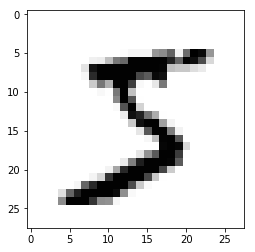

In [14]:
imshow(x_train[0],cmap='Greys')

In [15]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
# Making sure that the values are float so that we can get decimal points after division
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# Normalizing the RGB codes by dividing it to the max RGB value.
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


### Train

In [16]:
from keras import backend as K
from keras.utils import to_categorical
from keras.models import Model
from keras.layers import Dense, Reshape, Flatten, Input, Dropout
from keras.layers.core import Activation
from keras.layers.convolutional import Conv2D
from keras.layers.normalization import BatchNormalization
from keras.optimizers import Adam, RMSprop, SGD
from keras.layers.pooling import GlobalAveragePooling2D,MaxPooling2D
from keras.losses import categorical_crossentropy

input = Input(shape=(28,28,1),name='input_part')
out=Conv2D(32, (5, 5), activation='relu')(input)
out=MaxPooling2D(pool_size=(2, 2))(out)
out=Dropout(0.2)(out)
out=Flatten()(out)
out=Dense(128, activation='relu')(out)
out=Dense(10,activation='softmax')(out)

model = Model(input, out)

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Using TensorFlow backend.


In [17]:
model.layers[2].trainable

True

In [18]:
model.fit(x_train,to_categorical(y_train),epochs=2)

Epoch 1/2
60000/60000 [==============================] - 19s 318us/step - loss: 0.1374 - acc: 0.9586
Epoch 2/2
60000/60000 [==============================] - 21s 350us/step - loss: 0.0491 - acc: 0.9856


# Counterfactual Explanations

In [19]:
X=x_train[54:55]
X.shape

(1, 28, 28, 1)

### Adversarial search

In [33]:
importlib.reload(counterfactuals)

<module 'counterfactuals' from '../alibi/explainers/counterfactual/counterfactuals.py'>

In [34]:
cf = counterfactuals.CounterFactualAdversarialSearch(model.predict,initial_lam=1,maxiter=500,target_probability=1,tollerance=0,optimizer=None,verbose=True,)
cf.fit(x_train,y_train)

In [35]:
"""cf = counterfactuals.CounterFactualRandomSearch(model,target_probability=0,tollerance=0,sampling_method='gaussian',maxiter=2000,epsilon=0.01,epsilon_step=0.01,max_epsilon=1)
cf.fit(x_train,y_train)
"""

"cf = counterfactuals.CounterFactualRandomSearch(model,target_probability=0,tollerance=0,sampling_method='gaussian',maxiter=2000,epsilon=0.01,epsilon_step=0.01,max_epsilon=1)\ncf.fit(x_train,y_train)\n"

In [36]:
cf.target_probability

1

In [38]:
expl=cf.explain(X)

Starting minimization with Lambda = 1
[0.01209514] 0.0 1
[0.01209514] 0.0 1
[0.01209514] 0.0 1
[0.01209514] 0.0 1
[0.01209514] 0.0 1
[0.01209514] 0.0 1
[0.01209514] 0.0 1
[0.01209514] 0.0 1
[0.01209514] 0.0 1
[0.01209514] 0.0 1
[0.01209514] 0.0 1
[0.01209514] 0.0 1
[0.01209514] 0.0 1
[0.01209514] 0.0 1
[0.01209514] 0.0 1
[0.01209514] 0.0 1
[0.01209514] 0.0 1
[0.01209514] 0.0 1
[0.01209514] 0.0 1
[0.01209514] 0.0 1
[0.01209514] 0.0 1
[0.01209514] 0.0 1
[0.01209514] 0.0 1
[0.01209514] 0.0 1
[0.01209514] 0.0 1
[0.01209514] 0.0 1
[0.01209514] 0.0 1
[0.01209514] 0.0 1
[0.01209514] 0.0 1
[0.01209514] 0.0 1
[0.01209514] 0.0 1
[0.01209514] 0.0 1
[0.01209514] 0.0 1
[0.01209514] 0.0 1
[0.01209514] 0.0 1
[0.01209514] 0.0 1
[0.01209514] 0.0 1
[0.01209514] 0.0 1
[0.01209514] 0.0 1
[0.01209514] 0.0 1
[0.01209514] 0.0 1
[0.01209514] 0.0 1
[0.01209514] 0.0 1
[0.01209514] 0.0 1
[0.01209514] 0.0 1
[0.01209514] 0.0 1
[0.01209514] 0.0 1
[0.01209514] 0.0 1
[0.01209514] 0.0 1
[0.01209514] 0.0 1
[0.01209514]

[0.01209514] 0.0 1
[0.01209514] 0.0 1
[0.01209514] 0.0 1
[0.01209514] 0.0 1
[0.01209514] 0.0 1
[0.01209514] 0.0 1
[0.01209514] 0.0 1
[0.01209514] 0.0 1
[0.01209514] 0.0 1
[0.01209514] 0.0 1
[0.01209514] 0.0 1
[0.01209514] 0.0 1
[0.01209514] 0.0 1
[0.01209514] 0.0 1
[0.01209514] 0.0 1
[0.01209514] 0.0 1
[0.01209514] 0.0 1
[0.01209514] 0.0 1
[0.01209514] 0.0 1
[0.01209514] 0.0 1
[0.01209514] 0.0 1
[0.01209514] 0.0 1
[0.01209514] 0.0 1
[0.01209514] 0.0 1
[0.01209514] 0.0 1
[0.01209514] 0.0 1
[0.01209514] 0.0 1
[0.01209514] 0.0 1
[0.01209514] 0.0 1
[0.01209514] 0.0 1
[0.01209514] 0.0 1
[0.01209514] 0.0 1
[0.01209514] 0.0 1
[0.01209514] 0.0 1
[0.01209514] 0.0 1
[0.01209514] 0.0 1
[0.01209514] 0.0 1
[0.01209514] 0.0 1
[0.01209514] 0.0 1
[0.01209514] 0.0 1
[0.01209514] 0.0 1
[0.01209514] 0.0 1
[0.01209514] 0.0 1
[0.01209514] 0.0 1
[0.01209514] 0.0 1
[0.01209514] 0.0 1
[0.01209514] 0.0 1
[0.01209514] 0.0 1
[0.01209514] 0.0 1
[0.01209514] 0.0 1
[0.01209514] 0.0 1
[0.01209514] 0.0 1
[0.01209514]

[0.01210517] 0.0 1
[0.01210517] 0.0 1
[0.01210517] 0.0 1
[0.01210517] 0.0 1
[0.01210517] 0.0 1
[0.01210517] 0.0 1
[0.01210517] 0.0 1
[0.01210517] 0.0 1
[0.01210517] 0.0 1
[0.01210517] 0.0 1
[0.01210517] 0.0 1
[0.01210517] 0.0 1
[0.01210517] 0.0 1
[0.01210517] 0.0 1
[0.01210517] 0.0 1
[0.01210517] 0.0 1
[0.01210517] 0.0 1
[0.01210517] 0.0 1
[0.01210517] 0.0 1
[0.01210517] 0.0 1
[0.01210517] 0.0 1
[0.01210517] 0.0 1
[0.01210517] 0.0 1
[0.01210517] 0.0 1
[0.01210517] 0.0 1
[0.01210517] 0.0 1
[0.01210517] 0.0 1
[0.01210517] 0.0 1
[0.01210517] 0.0 1
[0.01210517] 0.0 1
[0.01210517] 0.0 1
[0.01210517] 0.0 1
[0.01210517] 0.0 1
[0.01210517] 0.0 1
[0.01210517] 0.0 1
[0.01210517] 0.0 1
[0.01210517] 0.0 1
[0.01210517] 0.0 1
[0.01210517] 0.0 1
[0.01210517] 0.0 1
[0.01210517] 0.0 1
[0.01210517] 0.0 1
[0.01210517] 0.0 1
[0.01210517] 0.0 1
[0.01210517] 0.0 1
[0.01210517] 0.0 1
[0.01210517] 0.0 1
[0.01210517] 0.0 1
[0.01210517] 0.0 1
[0.01210517] 0.0 1
[0.01210517] 0.0 1
[0.01210517] 0.0 1
[0.01210517]

[0.01210517] 0.0 1
[0.01210517] 0.0 1
[0.01210517] 0.0 1
[0.01210517] 0.0 1
[0.01210517] 0.0 1
[0.01210517] 0.0 1
[0.01210517] 0.0 1
[0.01210517] 0.0 1
[0.01210517] 0.0 1
[0.01210517] 0.0 1
[0.01210517] 0.0 1
[0.01210517] 0.0 1
[0.01210517] 0.0 1
[0.01210517] 0.0 1
[0.01210517] 0.0 1
[0.01210517] 0.0 1
[0.01210517] 0.0 1
[0.01210517] 0.0 1
[0.01210517] 0.0 1
[0.01210517] 0.0 1
[0.01210517] 0.0 1
[0.01210517] 0.0 1
[0.01210517] 0.0 1
[0.01210517] 0.0 1
[0.01210517] 0.0 1
[0.01210517] 0.0 1
[0.01210517] 0.0 1
[0.01210517] 0.0 1
[0.01210517] 0.0 1
[0.01210517] 0.0 1
[0.01210517] 0.0 1
[0.01210517] 0.0 1
[0.01210517] 0.0 1
[0.01210517] 0.0 1
[0.01210517] 0.0 1
[0.01210517] 0.0 1
[0.01210517] 0.0 1
[0.01210517] 0.0 1
[0.01210517] 0.0 1
[0.01210517] 0.0 1
[0.01210517] 0.0 1
[0.01210517] 0.0 1
[0.01210517] 0.0 1
[0.01210517] 0.0 1
[0.01210517] 0.0 1
[0.01210517] 0.0 1
[0.01210517] 0.0 1
[0.01210517] 0.0 1
[0.01210517] 0.0 1
[0.01210517] 0.0 1
[0.01210517] 0.0 1
[0.01210517] 0.0 1
[0.01210517]

[0.01213423] 0.0 1
[0.01213423] 0.0 1
[0.01213423] 0.0 1
[0.01213423] 0.0 1
[0.01213423] 0.0 1
[0.01213423] 0.0 1
[0.01213423] 0.0 1
[0.01213423] 0.0 1
[0.01213423] 0.0 1
[0.01213423] 0.0 1
[0.01213423] 0.0 1
[0.01213423] 0.0 1
[0.01213423] 0.0 1
[0.01213423] 0.0 1
[0.01213423] 0.0 1
[0.01213423] 0.0 1
[0.01213423] 0.0 1
[0.01213423] 0.0 1
[0.01213423] 0.0 1
[0.01213423] 0.0 1
[0.01213423] 0.0 1
[0.01213423] 0.0 1
[0.01213423] 0.0 1
[0.01213423] 0.0 1
[0.01213423] 0.0 1
[0.01213423] 0.0 1
[0.01213423] 0.0 1
[0.01213423] 0.0 1
[0.01213423] 0.0 1
[0.01213423] 0.0 1
[0.01213423] 0.0 1
[0.01213423] 0.0 1
[0.01213423] 0.0 1
[0.01213423] 0.0 1
[0.01213423] 0.0 1
[0.01213423] 0.0 1
[0.01213423] 0.0 1
[0.01213423] 0.0 1
[0.01213423] 0.0 1
[0.01213423] 0.0 1
[0.01213423] 0.0 1
[0.01213423] 0.0 1
[0.01213423] 0.0 1
[0.01213423] 0.0 1
[0.01213423] 0.0 1
[0.01213423] 0.0 1
[0.01213423] 0.0 1
[0.01213423] 0.0 1
[0.01213423] 0.0 1
[0.01213423] 0.0 1
[0.01213423] 0.0 1
[0.01213423] 0.0 1
[0.01213423]

[0.01213423] 0.0 1
[0.01213423] 0.0 1
[0.01213423] 0.0 1
[0.01213423] 0.0 1
[0.01213423] 0.0 1
[0.01213423] 0.0 1
[0.01213423] 0.0 1
[1.] 0.0 1
[1.] 0.0 1
[1.] 0.0 1
[1.] 0.0 1
[0.99988985] 0.0 1
[0.55787355] 0.0 1
[0.04903544] 0.0 1
[0.02237086] 0.0 1
[0.01599226] 0.0 1
[0.0136983] 0.0 1
[0.01287162] 0.0 1
[0.01287162] 0.0 1
[0.01287162] 0.0 1
[0.01287162] 0.0 1
[0.01287162] 0.0 1
[0.01287162] 0.0 1
[0.01287162] 0.0 1
[0.01287162] 0.0 1
[0.01287162] 0.0 1
[0.01287162] 0.0 1
[0.01287162] 0.0 1
[0.01287162] 0.0 1
[0.01287162] 0.0 1
[0.01287162] 0.0 1
[0.01287162] 0.0 1
[0.01287162] 0.0 1
[0.01287162] 0.0 1
[0.01287162] 0.0 1
[0.01287162] 0.0 1
[0.01287162] 0.0 1
[0.01287162] 0.0 1
[0.01287162] 0.0 1
[0.01287162] 0.0 1
[0.01287162] 0.0 1
[0.01287162] 0.0 1
[0.01287162] 0.0 1
[0.01287162] 0.0 1
[0.01287162] 0.0 1
[0.01287162] 0.0 1
[0.01287162] 0.0 1
[0.01287162] 0.0 1
[0.01287162] 0.0 1
[0.01287162] 0.0 1
[0.01287162] 0.0 1
[0.01287162] 0.0 1
[0.01287162] 0.0 1
[0.01287162] 0.0 1
[0.0128

[0.01287162] 0.0 1
[0.01287162] 0.0 1
[0.01287162] 0.0 1
[0.01287162] 0.0 1
[0.01287162] 0.0 1
[0.01287162] 0.0 1
[0.01287162] 0.0 1
[0.01287162] 0.0 1
[0.01287162] 0.0 1
[0.01287162] 0.0 1
[0.01287162] 0.0 1
[0.01287162] 0.0 1
[0.01287162] 0.0 1
[0.01287162] 0.0 1
[0.01287162] 0.0 1
[0.01287162] 0.0 1
[0.01287162] 0.0 1
[0.01287162] 0.0 1
[0.01287162] 0.0 1
[0.01287162] 0.0 1
[0.01287162] 0.0 1
[0.01287162] 0.0 1
[0.01287162] 0.0 1
[0.01287162] 0.0 1
[0.01287162] 0.0 1
[0.01287164] 0.0 1
[0.01287164] 0.0 1
[0.01287164] 0.0 1
[0.01287164] 0.0 1
[0.01287162] 0.0 1
[0.01287162] 0.0 1
[0.01287162] 0.0 1
[0.01287162] 0.0 1
[0.01287162] 0.0 1
[0.01287162] 0.0 1
[0.01287162] 0.0 1
[0.01287162] 0.0 1
[0.01287162] 0.0 1
[0.01287162] 0.0 1
[0.01287162] 0.0 1
[0.01287162] 0.0 1
[0.01287162] 0.0 1
[0.01287162] 0.0 1
[0.01287162] 0.0 1
[0.01287162] 0.0 1
[0.01287162] 0.0 1
[0.01287162] 0.0 1
[0.01287162] 0.0 1
[0.01287162] 0.0 1
[0.01287162] 0.0 1
[0.01287162] 0.0 1
[0.01287162] 0.0 1
[0.01287164]

[0.9999939] 0.0 1
[0.9999939] 0.0 1
[0.9999939] 0.0 1
[0.9999939] 0.0 1
[0.9999939] 0.0 1
[0.9999939] 0.0 1
[0.9999939] 0.0 1
[0.9999939] 0.0 1
[0.9999939] 0.0 1
[0.9999939] 0.0 1
[0.9999939] 0.0 1
[0.9999939] 0.0 1
[0.9999939] 0.0 1
[0.9999939] 0.0 1
[0.9999939] 0.0 1
[0.9999939] 0.0 1
[0.9999939] 0.0 1
[0.9999939] 0.0 1
[0.9999939] 0.0 1
[0.9999939] 0.0 1
[0.9999939] 0.0 1
[0.9999939] 0.0 1
[0.9999939] 0.0 1
[0.9999939] 0.0 1
[0.9999939] 0.0 1
[0.9999939] 0.0 1
[0.9999939] 0.0 1
[0.9999939] 0.0 1
[0.9999939] 0.0 1
[0.9999939] 0.0 1
[0.9999939] 0.0 1
[0.9999939] 0.0 1
[0.9999939] 0.0 1
[0.9999939] 0.0 1
[0.9999939] 0.0 1
[0.9999939] 0.0 1
[0.9999939] 0.0 1
[0.9999939] 0.0 1
[0.9999939] 0.0 1
[0.9999939] 0.0 1
[0.9999939] 0.0 1
[0.9999939] 0.0 1
[0.9999939] 0.0 1
[0.9999939] 0.0 1
[0.9999939] 0.0 1
[0.9999939] 0.0 1
[0.9999939] 0.0 1
[0.9999939] 0.0 1
[0.9999939] 0.0 1
[0.9999939] 0.0 1
[0.9999939] 0.0 1
[0.9999939] 0.0 1
[0.9999939] 0.0 1
[0.9999939] 0.0 1
[0.9999939] 0.0 1
[0.9999939

[0.9999939] 0.0 1
[0.9999939] 0.0 1
[0.9999939] 0.0 1
[0.9999939] 0.0 1
[0.9999939] 0.0 1
[0.9999939] 0.0 1
[0.9999939] 0.0 1
[0.9999939] 0.0 1
[0.9999939] 0.0 1
[0.9999939] 0.0 1
[0.9999939] 0.0 1
[0.9999939] 0.0 1
[0.9999939] 0.0 1
[0.9999939] 0.0 1
[0.9999939] 0.0 1
[0.9999939] 0.0 1
[0.9999939] 0.0 1
[0.9999939] 0.0 1
[0.9999939] 0.0 1
[0.9999939] 0.0 1
[0.9999939] 0.0 1
[0.9999939] 0.0 1
[0.9999939] 0.0 1
[0.9999939] 0.0 1
[0.9999939] 0.0 1
[0.9999939] 0.0 1
[0.9999939] 0.0 1
[0.9999939] 0.0 1
[0.9999939] 0.0 1
[0.9999939] 0.0 1
[0.9999939] 0.0 1
[0.9999939] 0.0 1
[0.9999939] 0.0 1
[0.9999939] 0.0 1
[0.9999939] 0.0 1
[0.9999939] 0.0 1
[0.9999939] 0.0 1
[0.9999939] 0.0 1
[0.9999939] 0.0 1
[0.9999939] 0.0 1
[0.9999939] 0.0 1
[0.9999939] 0.0 1
[0.9999939] 0.0 1
[0.9999939] 0.0 1
[0.9999939] 0.0 1
[0.9999939] 0.0 1
[0.9999939] 0.0 1
[0.9999939] 0.0 1
[0.9999939] 0.0 1
[0.9999939] 0.0 1
[0.9999939] 0.0 1
[0.9999939] 0.0 1
[0.9999939] 0.0 1
[0.9999939] 0.0 1
[0.9999939] 0.0 1
[0.9999939

[0.01209514] 0.0 1
[0.01209514] 0.0 1
[0.01209514] 0.0 1
[0.01209514] 0.0 1
[0.01209514] 0.0 1
[0.01209514] 0.0 1
[0.01209514] 0.0 1
[0.01209514] 0.0 1
[0.01209514] 0.0 1
[0.01209514] 0.0 1
[0.01209514] 0.0 1
[0.01209514] 0.0 1
[0.01209514] 0.0 1
[0.01209514] 0.0 1
[0.01209514] 0.0 1
[0.01209514] 0.0 1
[0.01209514] 0.0 1
[0.01209514] 0.0 1
[0.01209514] 0.0 1
[0.01209514] 0.0 1
[0.01209514] 0.0 1
[0.01209514] 0.0 1
[0.01209514] 0.0 1
[0.01209514] 0.0 1
[0.01209514] 0.0 1
[0.01209514] 0.0 1
[0.01209514] 0.0 1
[0.01209514] 0.0 1
[0.01209514] 0.0 1
[0.01209514] 0.0 1
[0.01209514] 0.0 1
[0.01209514] 0.0 1
[0.01209514] 0.0 1
[0.01209514] 0.0 1
[0.01209514] 0.0 1
[0.01209514] 0.0 1
[0.01209514] 0.0 1
[0.01209514] 0.0 1
[0.01209514] 0.0 1
[0.01209514] 0.0 1
[0.01209514] 0.0 1
[0.01209514] 0.0 1
[0.01209514] 0.0 1
[0.01209514] 0.0 1
[0.01209514] 0.0 1
[0.01209514] 0.0 1
[0.01209514] 0.0 1
[0.01209514] 0.0 1
[0.01209514] 0.0 1
[0.01209514] 0.0 1
[0.01209514] 0.0 1
[0.01209514] 0.0 1
[0.01209514]

[0.01209514] 0.0 1
[0.01209514] 0.0 1
[0.01209514] 0.0 1
[0.01209514] 0.0 1
[0.01209514] 0.0 1
[0.01209514] 0.0 1
[0.01209514] 0.0 1
[0.01209514] 0.0 1
[0.01209514] 0.0 1
[0.01209514] 0.0 1
[0.01209514] 0.0 1
[0.01209514] 0.0 1
[0.01209514] 0.0 1
[0.01209514] 0.0 1
[0.01209514] 0.0 1
[0.01209514] 0.0 1
[0.01209514] 0.0 1
[0.01209514] 0.0 1
[0.01209514] 0.0 1
[0.01209514] 0.0 1
[0.01209514] 0.0 1
[0.01209514] 0.0 1
[0.01209514] 0.0 1
[0.01209514] 0.0 1
[0.01209514] 0.0 1
[0.01209514] 0.0 1
[0.01209514] 0.0 1
[0.01209514] 0.0 1
[0.01209514] 0.0 1
[0.01209514] 0.0 1
[0.01209514] 0.0 1
[0.01209514] 0.0 1
[0.01209514] 0.0 1
[0.01209514] 0.0 1
[0.01209514] 0.0 1
[0.01209514] 0.0 1
[0.01209514] 0.0 1
[0.01209514] 0.0 1
[0.01209514] 0.0 1
[0.01209514] 0.0 1
[0.01209514] 0.0 1
[0.01209514] 0.0 1
[0.01209514] 0.0 1
[0.01209514] 0.0 1
[0.01209514] 0.0 1
[0.01209514] 0.0 1
[0.01209514] 0.0 1
[0.01209514] 0.0 1
[0.01209514] 0.0 1
[0.01209514] 0.0 1
[0.01209514] 0.0 1
[0.01209514] 0.0 1
[0.01209514]

[0.01210517] 0.0 1
[0.01210517] 0.0 1
[0.01210517] 0.0 1
[0.01210517] 0.0 1
[0.01210517] 0.0 1
[0.01210517] 0.0 1
[0.01210517] 0.0 1
[0.01210517] 0.0 1
[0.01210517] 0.0 1
[0.01210517] 0.0 1
[0.01210517] 0.0 1
[0.01210517] 0.0 1
[0.01210517] 0.0 1
[0.01210517] 0.0 1
[0.01210517] 0.0 1
[0.01210517] 0.0 1
[0.01210517] 0.0 1
[0.01210517] 0.0 1
[0.01210517] 0.0 1
[0.01210517] 0.0 1
[0.01210517] 0.0 1
[0.01210517] 0.0 1
[0.01210517] 0.0 1
[0.01210517] 0.0 1
[0.01210517] 0.0 1
[0.01210517] 0.0 1
[0.01210517] 0.0 1
[0.01210517] 0.0 1
[0.01210517] 0.0 1
[0.01210517] 0.0 1
[0.01210517] 0.0 1
[0.01210517] 0.0 1
[0.01210517] 0.0 1
[0.01210517] 0.0 1
[0.01210517] 0.0 1
[0.01210517] 0.0 1
[0.01210517] 0.0 1
[0.01210517] 0.0 1
[0.01210517] 0.0 1
[0.01210517] 0.0 1
[0.01210517] 0.0 1
[0.01210517] 0.0 1
[0.01210517] 0.0 1
[0.01210517] 0.0 1
[0.01210517] 0.0 1
[0.01210517] 0.0 1
[0.01210517] 0.0 1
[0.01210517] 0.0 1
[0.01210517] 0.0 1
[0.01210517] 0.0 1
[0.01210517] 0.0 1
[0.01210517] 0.0 1
[0.01210517]

[0.01213423] 0.0 1
[0.01213423] 0.0 1
[0.01213423] 0.0 1
[0.01213423] 0.0 1
[0.01213423] 0.0 1
[0.01213423] 0.0 1
[0.01213423] 0.0 1
[0.01213423] 0.0 1
[0.01213423] 0.0 1
[0.01213423] 0.0 1
[0.01213423] 0.0 1
[0.01213423] 0.0 1
[0.01213423] 0.0 1
[0.01213423] 0.0 1
[0.01213423] 0.0 1
[0.01213423] 0.0 1
[0.01213423] 0.0 1
[0.01213423] 0.0 1
[0.01213423] 0.0 1
[0.01213423] 0.0 1
[0.01213423] 0.0 1
[0.01213423] 0.0 1
[0.01213423] 0.0 1
[0.01213423] 0.0 1
[0.01213423] 0.0 1
[0.01213423] 0.0 1
[0.01213423] 0.0 1
[0.01213423] 0.0 1
[0.01213423] 0.0 1
[0.01213423] 0.0 1
[0.01213423] 0.0 1
[0.01213423] 0.0 1
[0.01213423] 0.0 1
[0.01213423] 0.0 1
[0.01213423] 0.0 1
[0.01213423] 0.0 1
[0.01213423] 0.0 1
[0.01213423] 0.0 1
[0.01213423] 0.0 1
[0.01213423] 0.0 1
[0.01213423] 0.0 1
[0.01213423] 0.0 1
[0.01213423] 0.0 1
[0.01213423] 0.0 1
[0.01213423] 0.0 1
[0.01213423] 0.0 1
[0.01213423] 0.0 1
[0.01213423] 0.0 1
[0.01213423] 0.0 1
[0.01213423] 0.0 1
[0.01213423] 0.0 1
[0.01213423] 0.0 1
[0.01213423]

[0.01213423] 0.0 1
[0.01213423] 0.0 1
[0.01213423] 0.0 1
[0.01213423] 0.0 1
[0.01213423] 0.0 1
[0.01213423] 0.0 1
[0.01213423] 0.0 1
[0.01213423] 0.0 1
[0.01213423] 0.0 1
[0.01213423] 0.0 1
[0.01213423] 0.0 1
[0.01213423] 0.0 1
[0.01213423] 0.0 1
[0.01213423] 0.0 1
[0.01213423] 0.0 1
[0.01213423] 0.0 1
[0.01213423] 0.0 1
[0.01213423] 0.0 1
[0.01213423] 0.0 1
[0.01213423] 0.0 1
[0.01213423] 0.0 1
[0.01213423] 0.0 1
[0.01213425] 0.0 1
[0.01213425] 0.0 1
[0.01213425] 0.0 1
[0.01213423] 0.0 1
[0.01213425] 0.0 1
[0.01213423] 0.0 1
[0.01213423] 0.0 1
[0.01213423] 0.0 1
[0.01213423] 0.0 1
[0.01213423] 0.0 1
[0.01213423] 0.0 1
[0.01213423] 0.0 1
[0.01213423] 0.0 1
[0.01213423] 0.0 1
[0.01213423] 0.0 1
[0.01213423] 0.0 1
[0.01213423] 0.0 1
[0.01213423] 0.0 1
[0.01213423] 0.0 1
[0.01213423] 0.0 1
[0.01213423] 0.0 1
[0.01213423] 0.0 1
[0.01213423] 0.0 1
[0.01213423] 0.0 1
[0.01213423] 0.0 1
[0.01213423] 0.0 1
[0.01213423] 0.0 1
[0.01213423] 0.0 1
[0.01213425] 0.0 1
[0.01213425] 0.0 1
[0.01213423]

[0.01287162] 0.0 1
[0.01287162] 0.0 1
[0.01287162] 0.0 1
[0.01287162] 0.0 1
[0.01287162] 0.0 1
[0.01287162] 0.0 1
[0.01287162] 0.0 1
[0.01287162] 0.0 1
[0.01287162] 0.0 1
[0.01287162] 0.0 1
[0.01287162] 0.0 1
[0.01287162] 0.0 1
[0.01287162] 0.0 1
[0.01287162] 0.0 1
[0.01287162] 0.0 1
[0.01287162] 0.0 1
[0.01287162] 0.0 1
[0.01287162] 0.0 1
[0.01287162] 0.0 1
[0.01287162] 0.0 1
[0.01287162] 0.0 1
[0.01287162] 0.0 1
[0.01287162] 0.0 1
[0.01287162] 0.0 1
[0.01287162] 0.0 1
[0.01287162] 0.0 1
[0.01287162] 0.0 1
[0.01287162] 0.0 1
[0.01287162] 0.0 1
[0.01287162] 0.0 1
[0.01287164] 0.0 1
[0.01287164] 0.0 1
[0.01287162] 0.0 1
[0.01287164] 0.0 1
[0.01287162] 0.0 1
[0.01287162] 0.0 1
[0.01287162] 0.0 1
[0.01287162] 0.0 1
[0.01287162] 0.0 1
[0.01287162] 0.0 1
[0.01287162] 0.0 1
[0.01287162] 0.0 1
[0.01287162] 0.0 1
[0.01287162] 0.0 1
[0.01287162] 0.0 1
[0.01287162] 0.0 1
[0.01287162] 0.0 1
[0.01287162] 0.0 1
[0.01287162] 0.0 1
[0.01287162] 0.0 1
[0.01287162] 0.0 1
[0.01287162] 0.0 1
[0.01287162]

[0.01287162] 0.0 1
[0.01287162] 0.0 1
[0.01287162] 0.0 1
[0.01287162] 0.0 1
[0.01287162] 0.0 1
[0.01287162] 0.0 1
[0.01287162] 0.0 1
[0.01287162] 0.0 1
[0.01287162] 0.0 1
[0.01287162] 0.0 1
[0.01287162] 0.0 1
[0.01287162] 0.0 1
[0.01287162] 0.0 1
[0.01287162] 0.0 1
[0.01287162] 0.0 1
[0.01287162] 0.0 1
[0.01287162] 0.0 1
[0.01287162] 0.0 1
[0.01287162] 0.0 1
[0.01287162] 0.0 1
[0.01287162] 0.0 1
[0.01287162] 0.0 1
[0.01287162] 0.0 1
[0.01287162] 0.0 1
[0.01287162] 0.0 1
[0.01287162] 0.0 1
[0.01287162] 0.0 1
[0.01287162] 0.0 1
[0.01287162] 0.0 1
[0.01287162] 0.0 1
[0.01287162] 0.0 1
[0.01287162] 0.0 1
[0.01287162] 0.0 1
[0.01287162] 0.0 1
[0.01287162] 0.0 1
[0.01287162] 0.0 1
[0.01287162] 0.0 1
[0.01287162] 0.0 1
[0.01287162] 0.0 1
[0.01287162] 0.0 1
[0.01287162] 0.0 1
[0.01287162] 0.0 1
[0.01287162] 0.0 1
[0.01287162] 0.0 1
[0.01287162] 0.0 1
[0.01287162] 0.0 1
[0.01287162] 0.0 1
[0.01287162] 0.0 1
[0.01287162] 0.0 1
[0.01287162] 0.0 1
[0.01287162] 0.0 1
[0.01287162] 0.0 1
[0.01287162]

[0.9999939] 0.0 1
[0.9999939] 0.0 1
[0.9999939] 0.0 1
[0.9999939] 0.0 1
[0.9999939] 0.0 1
[0.9999939] 0.0 1
[0.9999939] 0.0 1
[0.9999939] 0.0 1
[0.9999939] 0.0 1
[0.9999939] 0.0 1
[0.9999939] 0.0 1
[0.9999939] 0.0 1
[0.9999939] 0.0 1
[0.9999939] 0.0 1
[0.9999939] 0.0 1
[0.9999939] 0.0 1
[0.9999939] 0.0 1
[0.9999939] 0.0 1
[0.9999939] 0.0 1
[0.9999939] 0.0 1
[0.9999939] 0.0 1
[0.9999939] 0.0 1
[0.9999939] 0.0 1
[0.9999939] 0.0 1
[0.9999939] 0.0 1
[0.9999939] 0.0 1
[0.9999939] 0.0 1
[0.9999939] 0.0 1
[0.9999939] 0.0 1
[0.9999939] 0.0 1
[0.9999939] 0.0 1
[0.9999939] 0.0 1
[0.9999939] 0.0 1
[0.9999939] 0.0 1
[0.9999939] 0.0 1
[0.9999939] 0.0 1
[0.9999939] 0.0 1
[0.9999939] 0.0 1
[0.9999939] 0.0 1
[0.9999939] 0.0 1
[0.9999939] 0.0 1
[0.9999939] 0.0 1
[0.9999939] 0.0 1
[0.9999939] 0.0 1
[0.9999939] 0.0 1
[0.9999939] 0.0 1
[0.9999939] 0.0 1
[0.9999939] 0.0 1
[0.9999939] 0.0 1
[0.9999939] 0.0 1
[0.9999939] 0.0 1
[0.9999939] 0.0 1
[0.9999939] 0.0 1
[0.9999939] 0.0 1
[0.9999939] 0.0 1
[0.9999939

In [39]:
cf_1=expl['vector'][0]

In [40]:
#cf_0 = cf

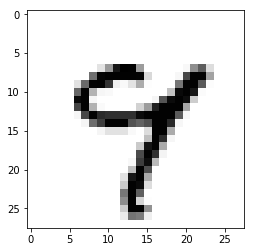

In [41]:
#visualize original instancea
imshow(X.reshape(28,28),cmap='Greys')

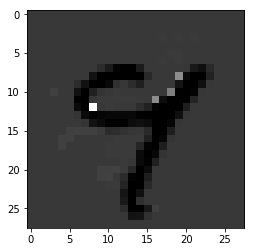

In [42]:
#Visualize counterfactual example
imshow(cf_1.reshape(28,28),cmap='Greys')

In [43]:
model.predict(cf_1.reshape(1,28,28,1))

array([[5.7034114e-11, 3.7365942e-06, 7.8201126e-03, 1.3789163e-02,
        4.5526591e-03, 9.3609749e-08, 1.6748716e-10, 9.7383094e-01,
        2.6836747e-07, 3.0633580e-06]], dtype=float32)

---

In [21]:
#Visualize Difference
imshow(abs(X.reshape(28,28)-expl.reshape(28,28)),cmap='Greys')

AttributeError: 'dict' object has no attribute 'reshape'

In [22]:
# Predictions for counterfactual instance
model.predict(expl)

ValueError: No data provided for "input_part". Need data for each key in: ['input_part']

### Expanding spheres

In [15]:
importlib.reload(counterfactuals)

<module 'counterfactuals' from '../alibi/explainers/counterfactual/counterfactuals.py'>

In [17]:
cf = counterfactuals.CounterFactualRandomSearch(model,sampling_method='gaussian')
cf.fit(x_train,y_train)

(60000, 784)


In [22]:
expl=cf.explain(X)

Original predicted class: 4; Majority class in sampled data: 4
Original predicted class: 4; Majority class in sampled data: 4
Original predicted class: 4; Majority class in sampled data: 4
Epsilon 0.30000000000000004
Number of samples: 100
Original predicted class 4 with probability [0.99864644]: 
Majority class in sampled data points  4
Closest flipped class:  9
Original instance shape: (1, 28, 28, 1)
Counfact instance shape: (1, 28, 28, 1)
L1 distance from X  89.4944939758054


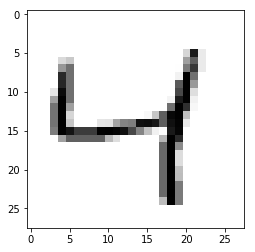

In [23]:
#visualize original instance
imshow(X.reshape(28,28),cmap='Greys')

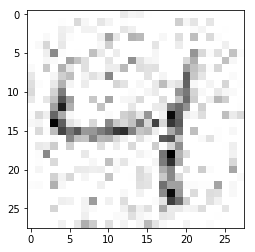

In [24]:
#Visualize counterfactual example
imshow(expl.reshape(28,28),cmap='Greys')

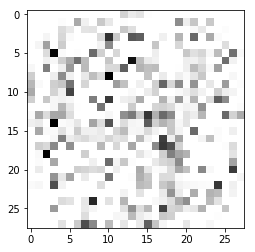

In [25]:
#Visualize Difference
imshow(abs(X.reshape(28,28)-expl.reshape(28,28)),cmap='Greys')

In [45]:
# Predictions for counterfactual instance
model.predict(expl)

array([[1.81991845e-06, 5.47842262e-03, 3.18945106e-03, 4.29507166e-01,
        2.80150115e-01, 2.37222714e-03, 8.60721485e-08, 1.31088095e-02,
        2.50578523e-01, 1.56134963e-02]], dtype=float32)

In [24]:
np.random.permutation(x_train)[:1].shape

(1, 28, 28, 1)